In [16]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load traceroute data from JSON file
def load_traceroute_data(file_path):
    with open(file_path, 'r') as f:
        traceroute_data = json.load(f)
    return traceroute_data

# Process traceroute data to flatten and structure it correctly
def process_traceroute_data(traceroute_data):
    traceroute_info = []
    
    for entry in traceroute_data:
        source_ip = entry.get('src_addr')
        destination_ip = entry.get('dst_name')
        region = entry.get('Region')
        country = entry.get('Country')
        timestamp = entry.get('timestamp')
        hops = entry.get('result', [])
        
        for hop in hops:
            hop_number = hop.get('hop')
            for hop_result in hop.get('result', []):
                if 'rtt' in hop_result:
                    traceroute_info.append({
                        'source_ip': source_ip,
                        'destination_ip': destination_ip,
                        'region': region,
                        'country': country,
                        'timestamp': timestamp,
                        'hop_ip': hop_result.get('from'),
                        'hop_number': hop_number,
                        'rtt': hop_result.get('rtt')
                    })
    
    return pd.DataFrame(traceroute_info)

# Analyze and save RTT by region
def analyze_rtt_by_region(traceroute_df, output_dir):
    plt.figure(figsize=(10, 6))
    avg_rtt_by_region = traceroute_df.groupby('region')['rtt'].mean().sort_values()
    avg_rtt_by_region.plot(kind='bar', color='skyblue', alpha=0.7)
    
    plt.title('Average RTT by Region')
    plt.xlabel('Region')
    plt.ylabel('Average RTT (ms)')
    plt.grid()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'trace_Average_RTT_by_Region.png'))
    plt.close()

# Heatmap and barplot visualizations
def create_visualizations(traceroute_df, output_dir):
    # Heatmap for average RTT by Region and CDN endpoint
    latency_df = traceroute_df.groupby(['region', 'destination_ip'])['rtt'].mean().unstack()
    plt.figure(figsize=(12, 8))
    sns.heatmap(latency_df, annot=True, cmap="YlOrRd", fmt=".1f", cbar_kws={'label': 'Average RTT (ms)'})
    plt.title("Average Latency (RTT) by Region and CDN Endpoint")
    plt.xlabel("CDN Endpoint")
    plt.ylabel("Region")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "trace_Average_Latency_RTT_by_Region_and_CDN_Endpoint.png"))
    plt.close()

    # Barplot for average latency by CDN endpoint and region
    latency_cdns = traceroute_df.groupby(['destination_ip', 'region'])['rtt'].mean().reset_index()
    plt.figure(figsize=(16, 10))
    sns.barplot(data=latency_cdns, x="destination_ip", y="rtt", hue="region", errorbar=None)
    plt.title("Average Latency by CDN Endpoint and Region")
    plt.xlabel("CDN Endpoint")
    plt.ylabel("Average RTT (ms)")
    plt.xticks(rotation=45)
    plt.legend(title="Region")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "trace_Average_Latency_by_CDN_Endpoint_and_Region.png"))
    plt.close()

# Time series plot of latency over time by CDN endpoint
def plot_latency_over_time(traceroute_df, output_dir):
    if 'timestamp' in traceroute_df.columns and not traceroute_df['timestamp'].isnull().all():
        traceroute_df['timestamp'] = pd.to_datetime(traceroute_df['timestamp'], unit='s')
        latency_time_series = traceroute_df.groupby(['timestamp', 'destination_ip'])['rtt'].mean().reset_index()
        plt.figure(figsize=(14, 8))
        sns.lineplot(data=latency_time_series, x="timestamp", y="rtt", hue="destination_ip")
        plt.title("Latency Over Time by CDN Endpoint")
        plt.xlabel("Time")
        plt.ylabel("Average RTT (ms)")
        plt.xticks(rotation=45)
        plt.legend(title="CDN Endpoint")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "trace_Latency_Over_Time_by_CDN_Endpoint.png"))
        plt.close()
    else:
        print("No timestamp data available for time series plot.")

# File path for traceroute data and set output directory
traceroute_file_path = './172.66.44.140 - CLOUDFLARE/traceroute_data_merged.json'
output_dir = os.path.dirname(traceroute_file_path)

# Load, process, and structure traceroute data
traceroute_data = load_traceroute_data(traceroute_file_path)
traceroute_df = process_traceroute_data(traceroute_data)

# Perform visualizations and save plots
analyze_rtt_by_region(traceroute_df, output_dir)
create_visualizations(traceroute_df, output_dir)
plot_latency_over_time(traceroute_df, output_dir)


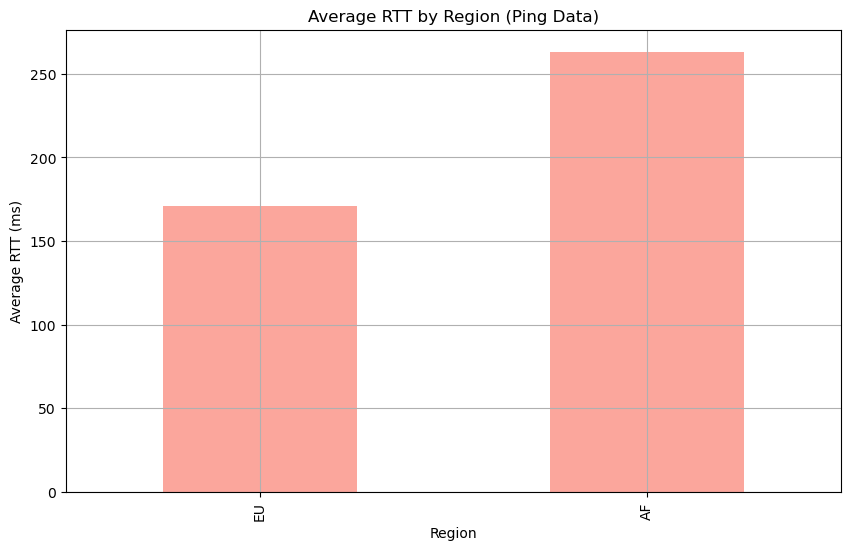

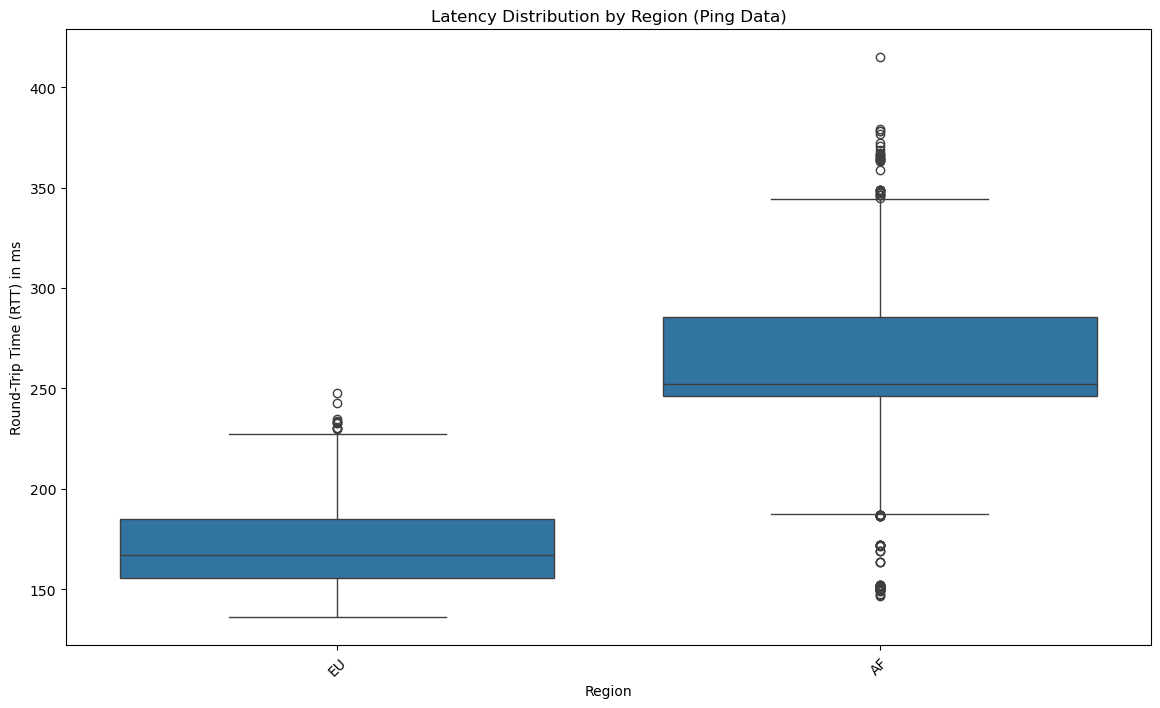

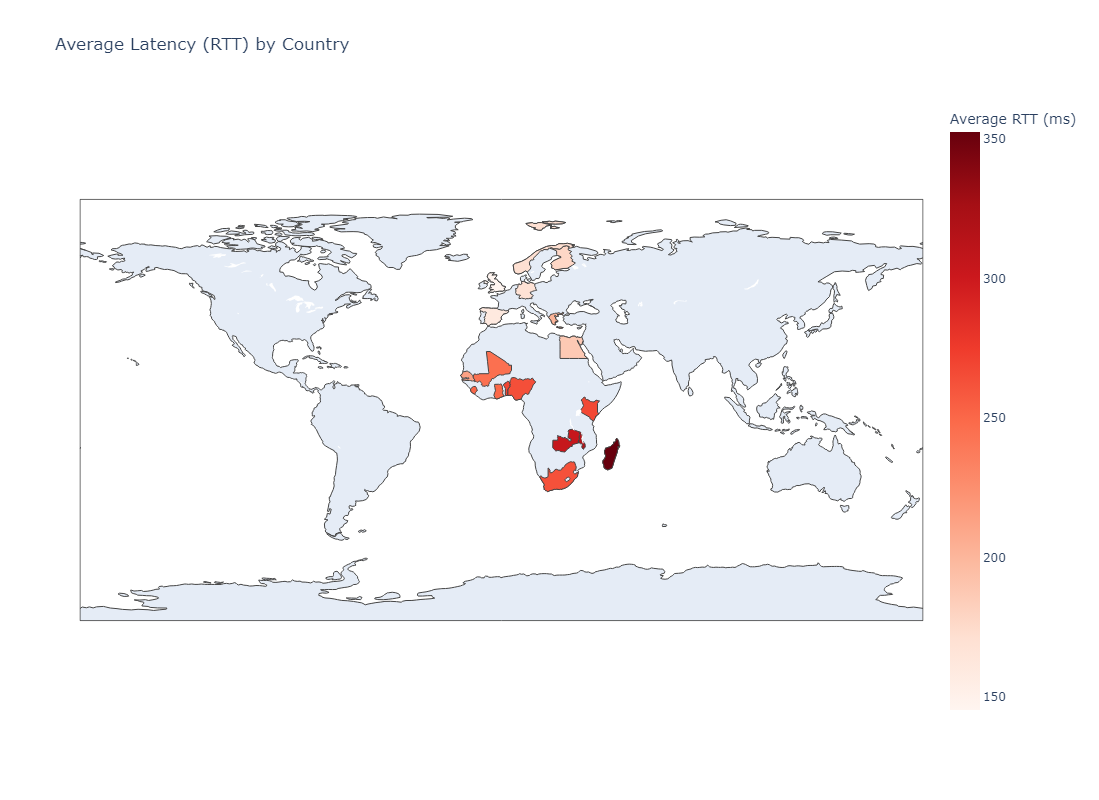

In [18]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Load ping data
def load_ping_data(file_path):
    with open(file_path, 'r') as f:
        ping_data = json.load(f)
    return ping_data

# Process ping data
def process_ping_data(ping_data):
    ping_info = []
    
    for entry in ping_data:
        source_ip = entry.get('src_addr')
        destination_ip = entry.get('dst_addr')
        region = entry.get('Region')
        country = entry.get('Country')
        rtt_values = entry.get('result', [])
        
        # Loop through each RTT measurement
        for rtt_entry in rtt_values:
            if 'rtt' in rtt_entry:
                ping_info.append({
                    'source_ip': source_ip,
                    'destination_ip': destination_ip,
                    'region': region,
                    'country': country,
                    'rtt': rtt_entry.get('rtt')
                })
    
    return pd.DataFrame(ping_info)

# Analyze and visualize RTT by region
def analyze_rtt_by_region(ping_df, save_dir):
    plt.figure(figsize=(10, 6))
    
    # Calculate average RTT by region
    avg_rtt_by_region = ping_df.groupby('region')['rtt'].mean().sort_values()
    avg_rtt_by_region.plot(kind='bar', color='salmon', alpha=0.7)
    
    plt.title('Average RTT by Region (Ping Data)')
    plt.xlabel('Region')
    plt.ylabel('Average RTT (ms)')
    plt.grid()
    
    # Save plot
    plt.savefig(os.path.join(save_dir, 'ping_average_rtt_by_region.png'))
    plt.show()

# Boxplot of latency distribution by region
def plot_latency_distribution_by_region(ping_df, save_dir):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=ping_df, x="region", y="rtt")
    plt.title("Latency Distribution by Region (Ping Data)")
    plt.xlabel("Region")
    plt.ylabel("Round-Trip Time (RTT) in ms")
    plt.xticks(rotation=45)
    
    # Save plot
    plt.savefig(os.path.join(save_dir, 'ping_latency_distribution_by_region.png'))
    plt.show()

# Choropleth map of average RTT by country
def plot_rtt_by_country(ping_df, save_dir):
    country_latency = ping_df.groupby('country')['rtt'].mean().reset_index()
    
    fig = px.choropleth(
        country_latency,
        locations="country",
        locationmode="country names",
        color="rtt",
        color_continuous_scale="reds",
        title="Average Latency (RTT) by Country",
        labels={'rtt': 'Average RTT (ms)'}
    )
    
    # Set figure size and save plot
    fig.update_layout(width=1200, height=800)
    fig.write_image(os.path.join(save_dir, 'ping_average_rtt_by_country.png'))
    fig.show()

# File path for ping data
ping_file_path = './20.69.151.16 - AZURE/ping_data_merged.json'
save_dir = os.path.dirname(ping_file_path)

# Load and process ping data
ping_data = load_ping_data(ping_file_path)
ping_df = process_ping_data(ping_data)

# Analyze and visualize data by region, saving each plot
analyze_rtt_by_region(ping_df, save_dir)
plot_latency_distribution_by_region(ping_df, save_dir)
plot_rtt_by_country(ping_df, save_dir)
